In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
import sklearn
print(sklearn.__version__)

0.22.1


### mathematische Grundlagen

In [3]:
def sigmoid(x):
    sigmoid = 1 / (1 + np.exp(-x))
    return sigmoid

In [4]:
x = np.linspace(-10, 10, 100)
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

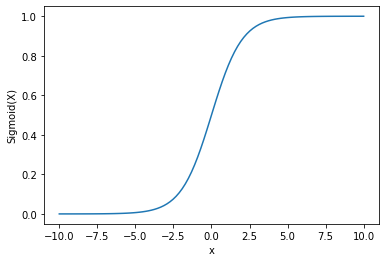

In [5]:
z = sigmoid(x)

ax = plt.plot(x, z)
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 

plt.show() 

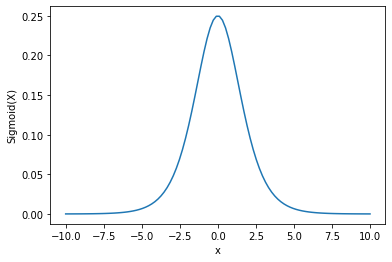

0.2493633927992353


In [6]:
#Ableitung der Sigmoid
ds = (np.exp(-x))/((1+np.exp(-x))**2)
ax = plt.plot(x, ds)
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 

plt.show() 
print(max(ds))

### load calculated delta measures

In [7]:
data = pd.DataFrame(pd.read_csv('DE_attribution', index_col=0))
data = data[data.cosine != 0.00]
data

,manhattan,cosine,euclidean,label,author
"Schopenhauer,-Johanna_Die Tante.txt",3.27,0.08,1.31,same,Schopenhauer
"Schopenhauer,-Johanna_Gabriele.txt",4.32,0.19,2.13,same,Schopenhauer
"Wieland,-Christoph-Martin_Die Abenteuer des Don Sylvio von Rosalva.txt",6.14,0.37,2.64,different,Wieland
"Hauff,-Wilhelm_Mitteilungen aus den Memoiren des Satan.txt",8.01,0.54,2.92,different,Hauff
"Spielhagen,-Friedrich_Zum Zeitvertreib.txt",8.13,0.59,3.03,different,Spielhagen
...,...,...,...,...,...
"Fischer,-Caroline-Auguste_Die Honigmonathe.txt",22.24,1.29,7.85,different,Fischer
"Fontane,-Theodor_Irrungen Wirrungen.txt",23.26,1.72,8.46,different,Fontane
"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",23.77,1.31,8.22,different,Fischer
"Fontane,-Theodor_Effi Briest.txt",23.90,1.75,8.52,different,Fontane


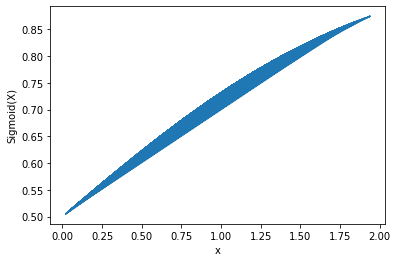

In [8]:
x = data['cosine'].values.reshape(-1,1)
z = sigmoid(x)
ax = plt.plot(x, z)
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 

plt.show() 

In [9]:
d = data.copy()
d.drop('manhattan', inplace=True, axis=1)
d.drop('euclidean', inplace=True, axis=1)
d.drop('author', inplace=True, axis=1)

cosine = d['cosine'].values.reshape(-1,1)  #np.unique machen?in Schleife unten werden trotzdem alle Zeilen erfasst damit
minx = min(cosine)
d

,cosine,label
"Schopenhauer,-Johanna_Die Tante.txt",0.08,same
"Schopenhauer,-Johanna_Gabriele.txt",0.19,same
"Wieland,-Christoph-Martin_Die Abenteuer des Don Sylvio von Rosalva.txt",0.37,different
"Hauff,-Wilhelm_Mitteilungen aus den Memoiren des Satan.txt",0.54,different
"Spielhagen,-Friedrich_Zum Zeitvertreib.txt",0.59,different
...,...,...
"Fischer,-Caroline-Auguste_Die Honigmonathe.txt",1.29,different
"Fontane,-Theodor_Irrungen Wirrungen.txt",1.72,different
"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",1.31,different
"Fontane,-Theodor_Effi Briest.txt",1.75,different


In [10]:
cos = np.unique(cosine)
minx

array([0.02])

### determine same and different authors in 1%-steps of cosine values

In [11]:
perc = 1.1
cos_range = max(cos)-min(cos)
n = np.arange(0.01, 1.01, 0.01)

for perc in n:
    for c in cos:
        if c <= minx + cos_range*perc:
            d.loc[d.cosine==float(c), np.around(perc, decimals=2)] = 'same'
        else:
             d.loc[d.cosine==float(c), np.around(perc, decimals=2)] = 'different'
d

,cosine,label,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0
"Schopenhauer,-Johanna_Die Tante.txt",0.08,same,different,different,different,same,same,same,same,same,...,same,same,same,same,same,same,same,same,same,same
"Schopenhauer,-Johanna_Gabriele.txt",0.19,same,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Wieland,-Christoph-Martin_Die Abenteuer des Don Sylvio von Rosalva.txt",0.37,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Hauff,-Wilhelm_Mitteilungen aus den Memoiren des Satan.txt",0.54,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Spielhagen,-Friedrich_Zum Zeitvertreib.txt",0.59,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Fischer,-Caroline-Auguste_Die Honigmonathe.txt",1.29,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Fontane,-Theodor_Irrungen Wirrungen.txt",1.72,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",1.31,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Fontane,-Theodor_Effi Briest.txt",1.75,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same


In [12]:
d[d.cosine<=0.22]

,cosine,label,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0
"Schopenhauer,-Johanna_Die Tante.txt",0.08,same,different,different,different,same,same,same,same,same,...,same,same,same,same,same,same,same,same,same,same
"Schopenhauer,-Johanna_Gabriele.txt",0.19,same,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Hauff,-Wilhelm_Lichtenstein.txt",0.19,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Kafka,-Franz_Der Prozess.txt",0.10,same,different,different,different,different,same,same,same,same,...,same,same,same,same,same,same,same,same,same,same
"Freytag,-Gustav_Soll und Haben.txt",0.21,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Lewald,-Fanny_Eine Lebensfrage.txt",0.22,same,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Schopenhauer,-Johanna_Richard Wood.txt",0.08,same,different,different,different,same,same,same,same,same,...,same,same,same,same,same,same,same,same,same,same
"Schopenhauer,-Johanna_Gabriele.txt",0.10,same,different,different,different,different,same,same,same,same,...,same,same,same,same,same,same,same,same,same,same
"Huber,-Therese_Ellen Percy.txt",0.18,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same


### calculate and visualize apha and beta errors

In [13]:
def normalized_cnf_matrix(cls, column, mfw):
    cnf = confusion_matrix(true_label, cols, normalize='all')
    fig, ax = plt.subplots(figsize=(5,5))
    #plt.figure(figsize=(5,5))  
    sns.heatmap(cnf, annot=True, cmap=sns.color_palette("Blues"), ax = ax); #annot=True to annotate cells

    
    tn, fp, fn, tp = cnf.ravel()
    
    error_dic = {'tn':tn, 'fp':fp, 'fn':fn, 'tp':tp}
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(cls)
    ax.yaxis.set_ticklabels(cls)
    
    plt.savefig(str(mfw) + str(column) + '_corpusDE_' + '.png')    
    
    plt.show()
    
    return error_dic

In [14]:
true_label = np.array(d.label)
d.drop('cosine', inplace=True, axis=1)
d.drop('label', inplace=True, axis=1)
d

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
"Schopenhauer,-Johanna_Die Tante.txt",different,different,different,same,same,same,same,same,same,same,...,same,same,same,same,same,same,same,same,same,same
"Schopenhauer,-Johanna_Gabriele.txt",different,different,different,different,different,different,different,different,same,same,...,same,same,same,same,same,same,same,same,same,same
"Wieland,-Christoph-Martin_Die Abenteuer des Don Sylvio von Rosalva.txt",different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Hauff,-Wilhelm_Mitteilungen aus den Memoiren des Satan.txt",different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Spielhagen,-Friedrich_Zum Zeitvertreib.txt",different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Fischer,-Caroline-Auguste_Die Honigmonathe.txt",different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Fontane,-Theodor_Irrungen Wirrungen.txt",different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
"Fontane,-Theodor_Effi Briest.txt",different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same


0.01


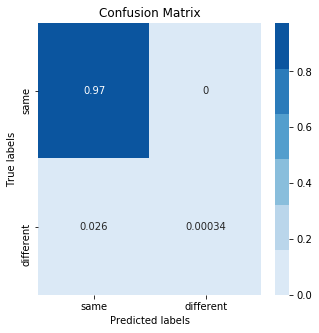

0.02


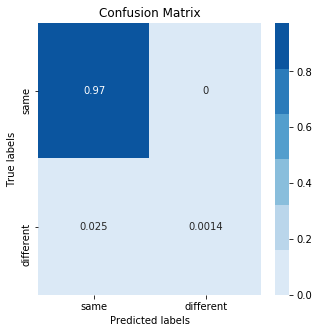

0.03


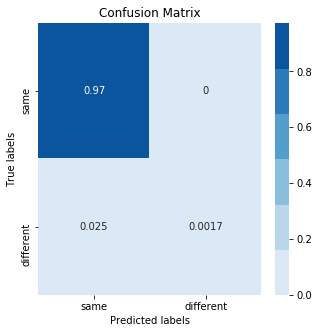

0.04


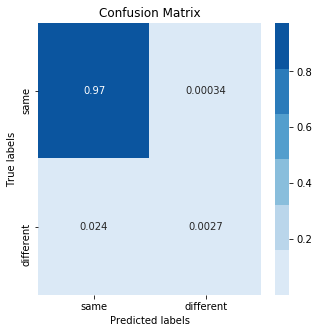

0.05


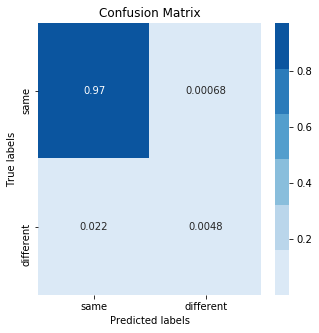

0.06


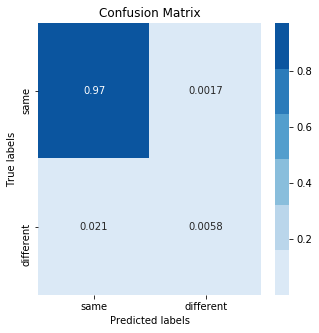

0.07


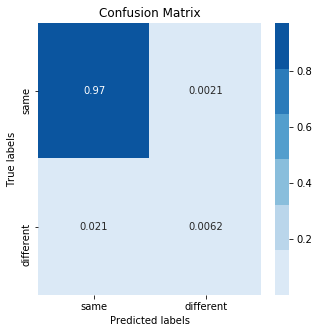

0.08


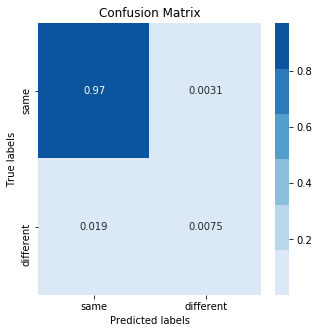

0.09


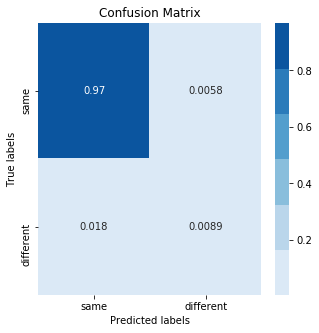

0.1


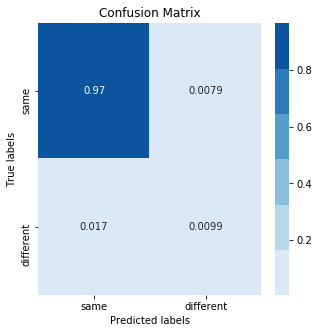

0.11


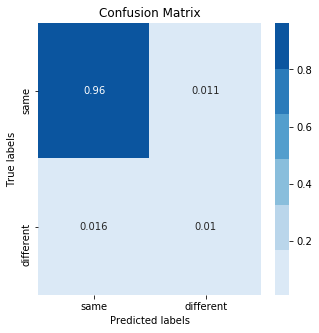

0.12


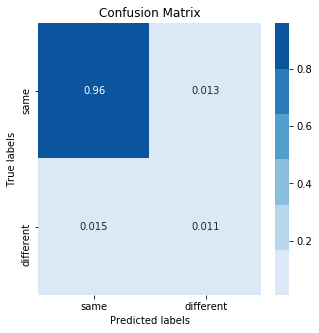

0.13


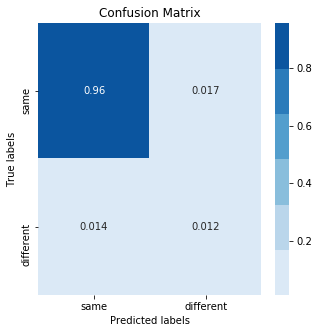

0.14


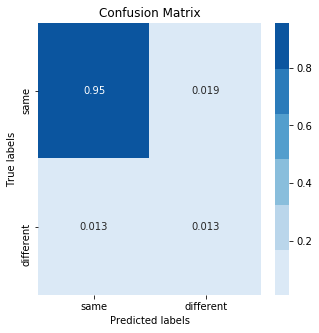

0.15


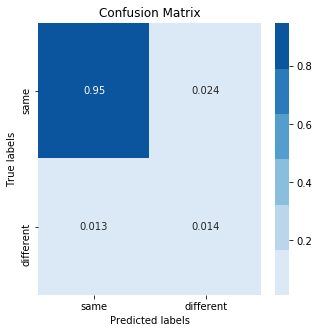

0.16


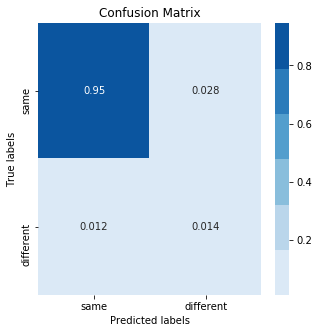

0.17


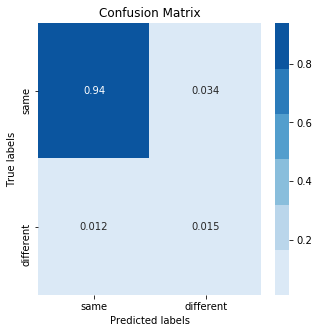

0.18


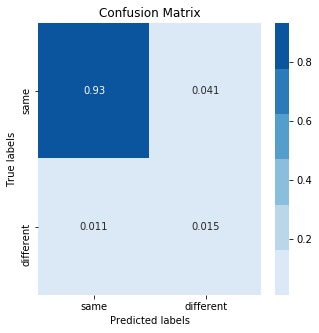

0.19


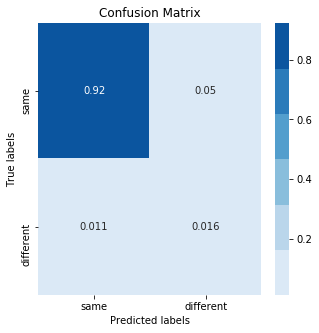

0.2


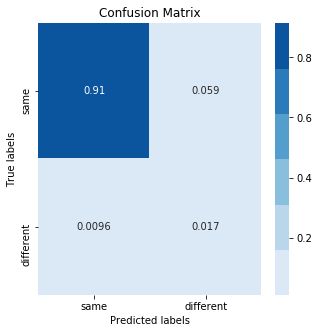

0.21


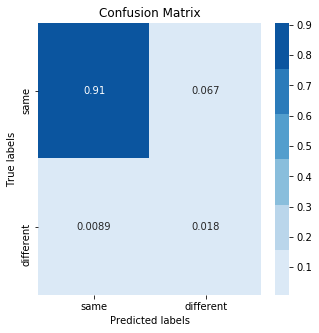

0.22


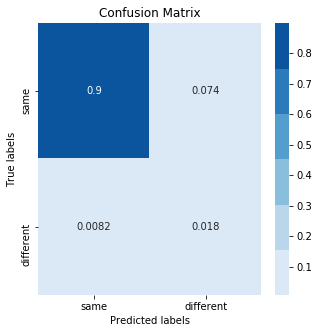

0.23


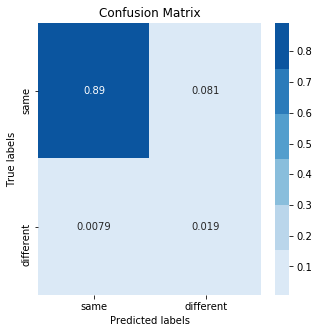

0.24


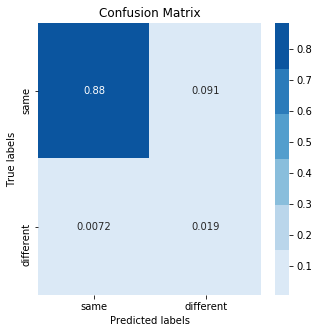

0.25


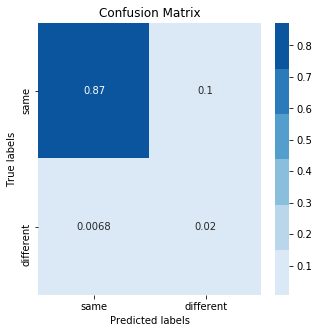

0.26


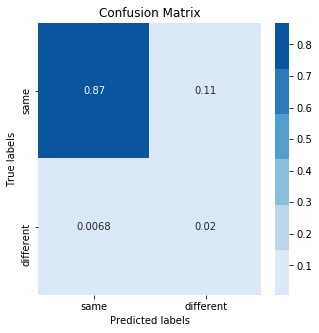

0.27


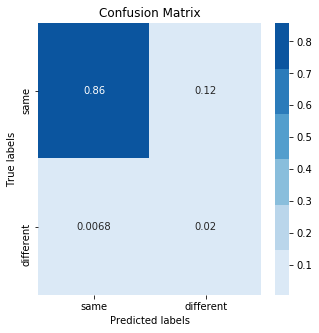

0.28


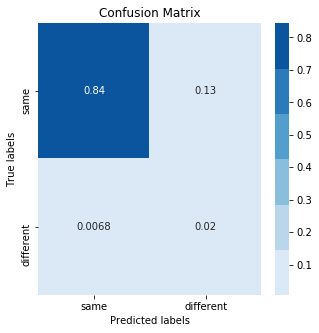

0.29


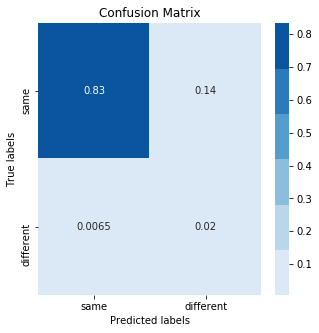

0.3


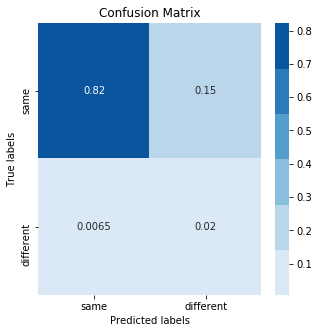

0.31


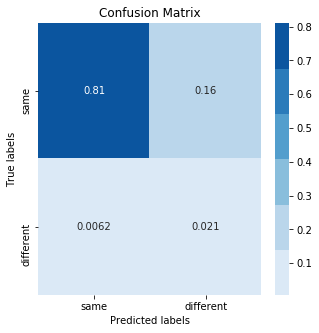

0.32


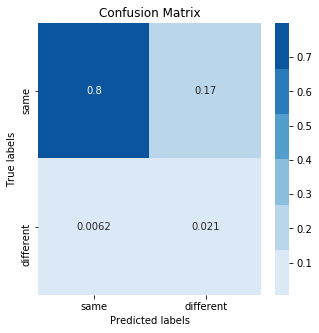

0.33


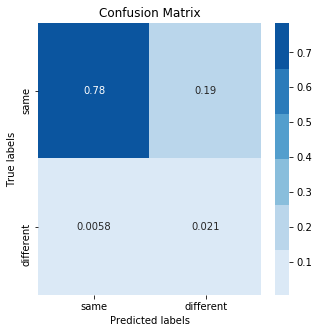

0.34


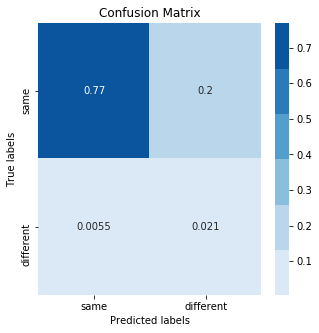

0.35


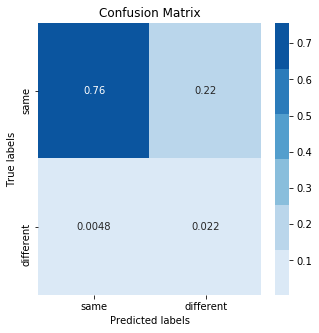

0.36


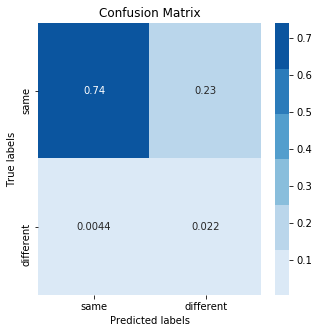

0.37


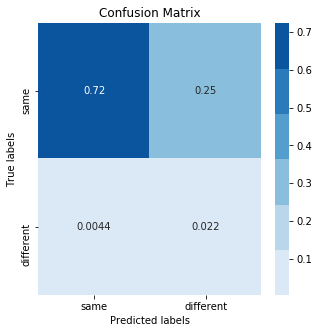

0.38


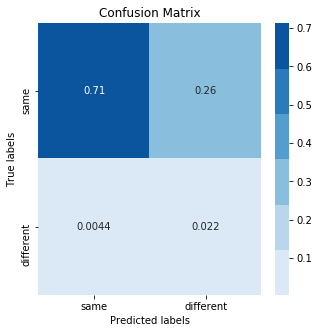

0.39


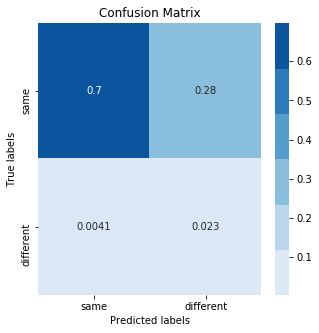

0.4


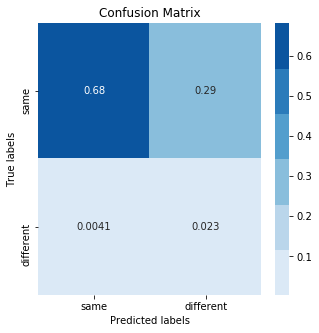

0.41


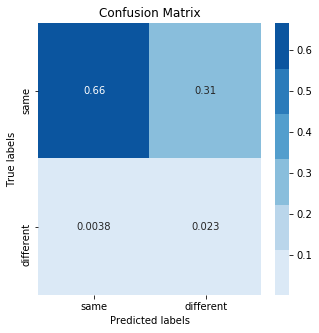

0.42


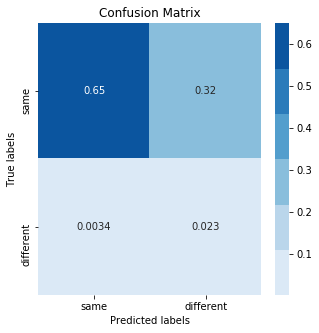

0.43


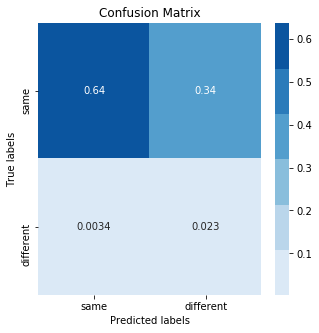

0.44


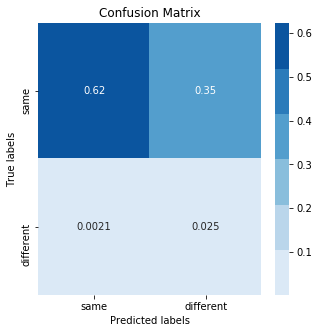

0.45


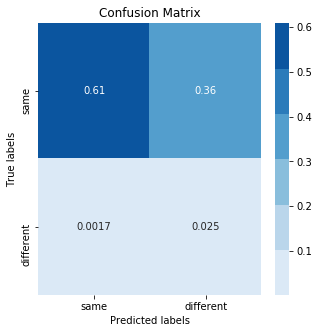

0.46


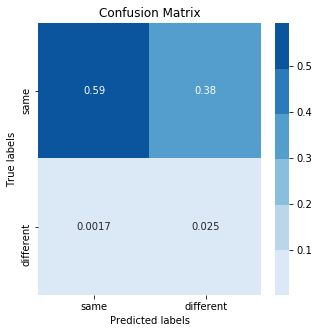

0.47


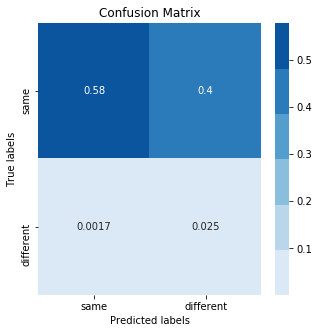

0.48


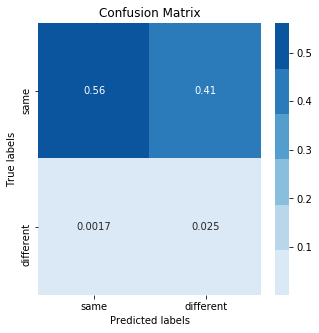

0.49


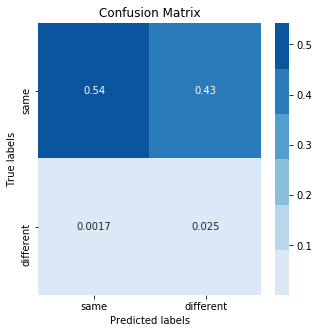

0.5


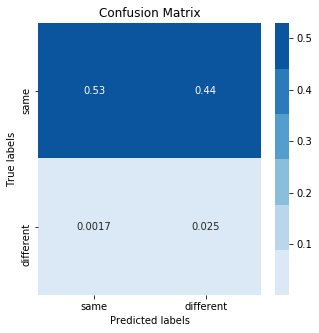

0.51


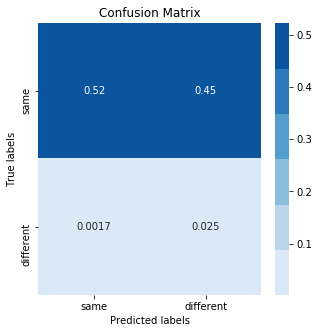

0.52


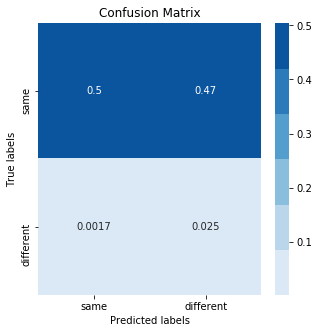

0.53


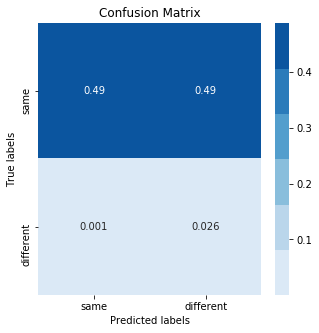

0.54


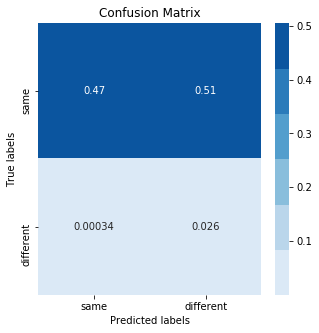

0.55


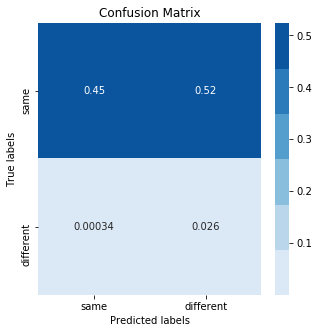

0.56


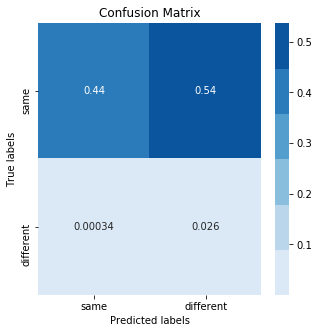

0.57


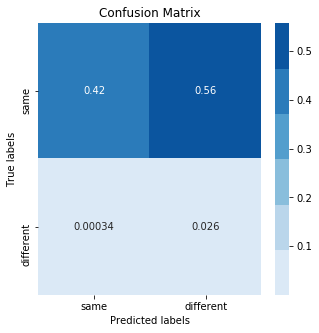

0.58


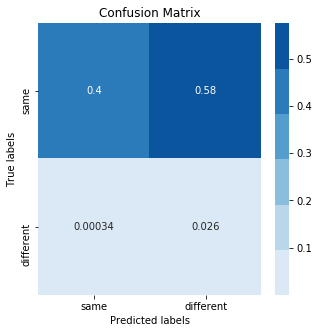

0.59


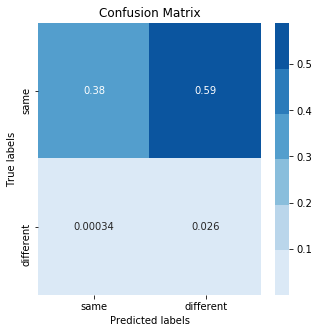

0.6


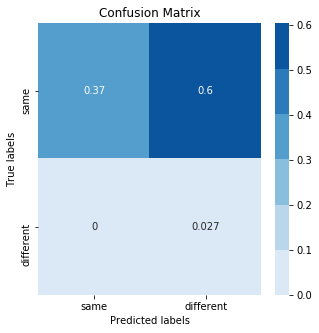

0.61


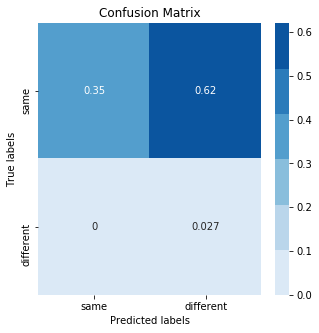

0.62


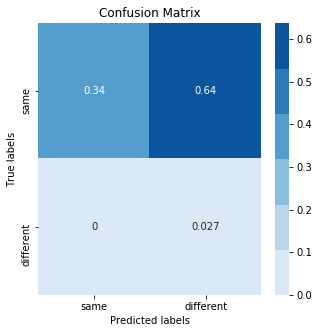

0.63


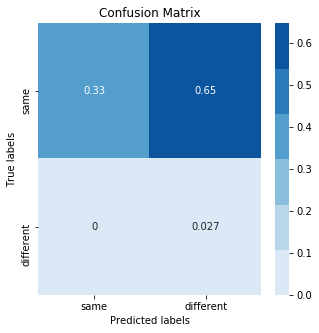

0.64


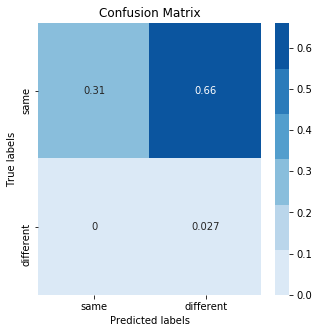

0.65


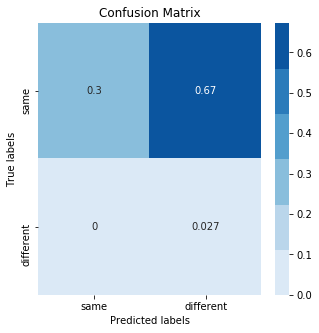

0.66


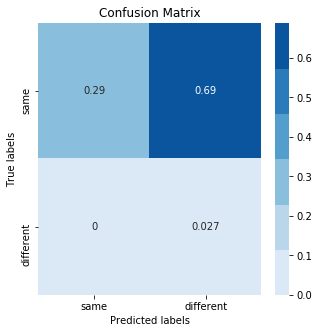

0.67


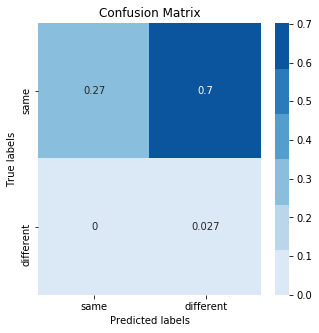

0.68


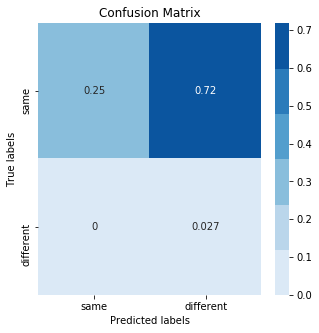

0.69


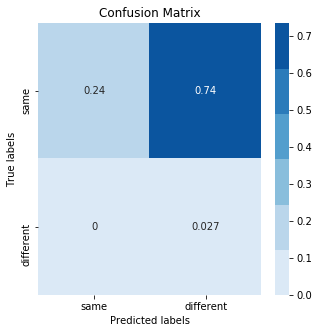

0.7


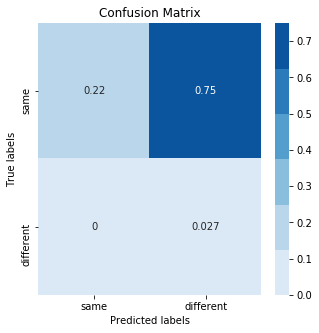

0.71


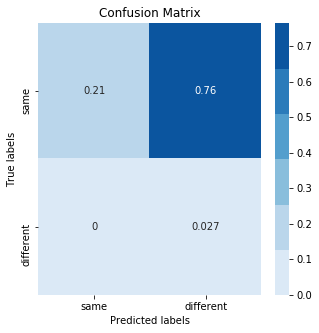

0.72


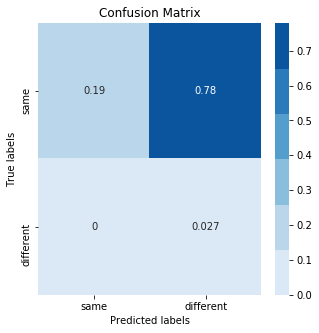

0.73


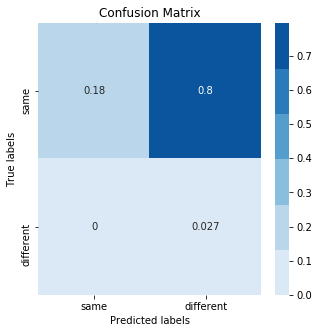

0.74


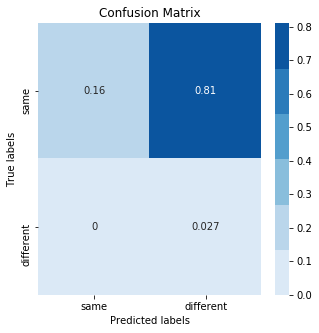

0.75


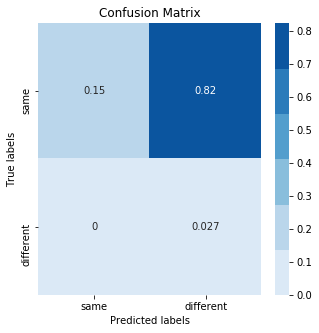

0.76


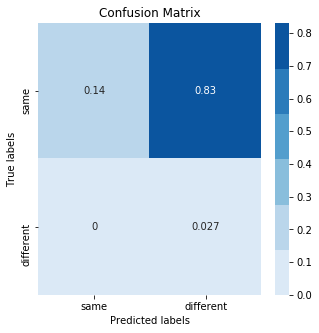

0.77


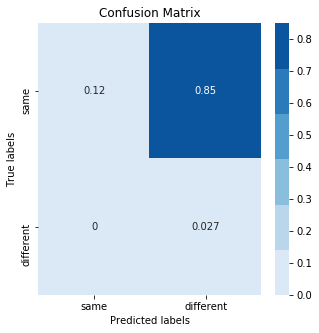

0.78


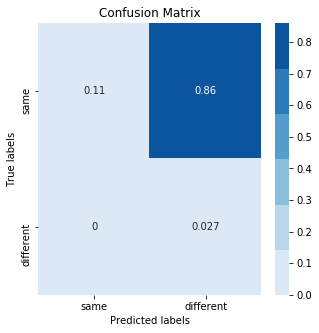

0.79


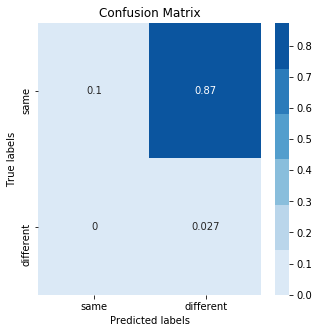

0.8


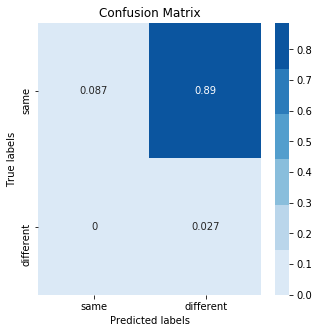

0.81


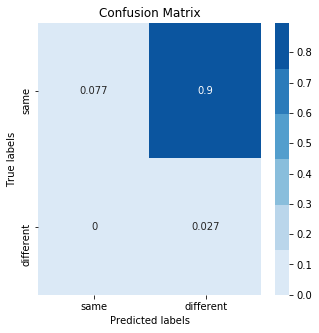

0.82


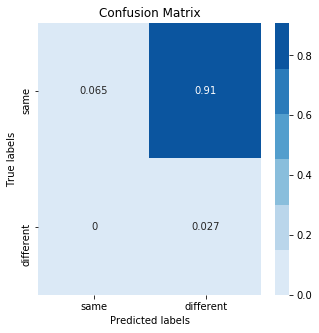

0.83


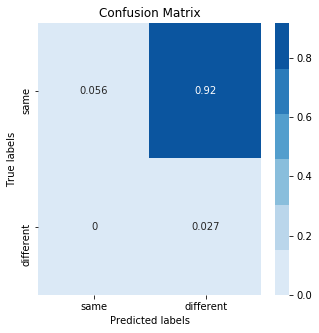

0.84


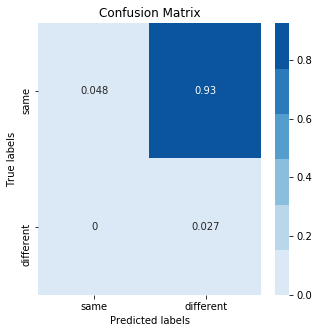

0.85


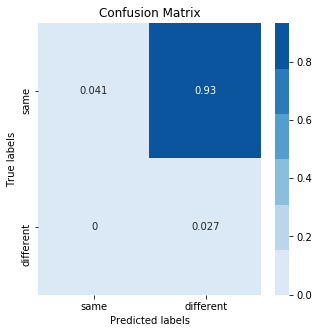

0.86


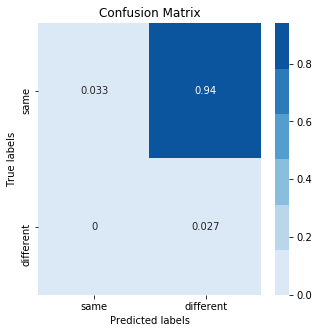

0.87


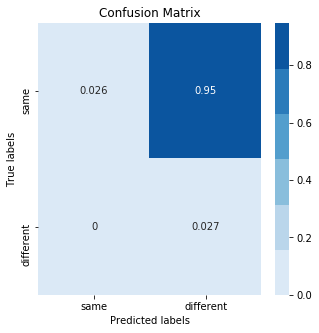

0.88


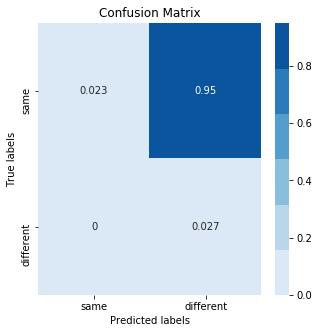

0.89


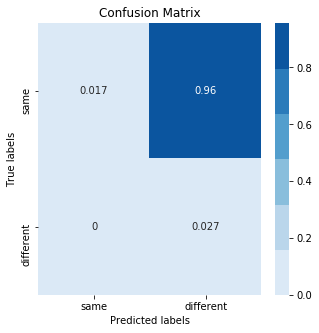

0.9


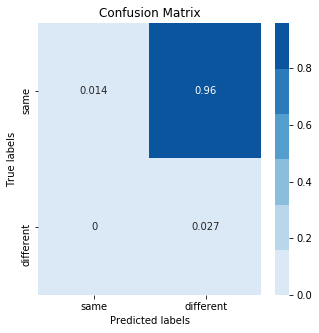

0.91


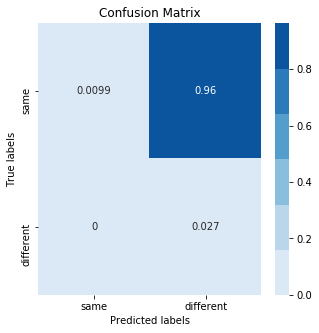

0.92


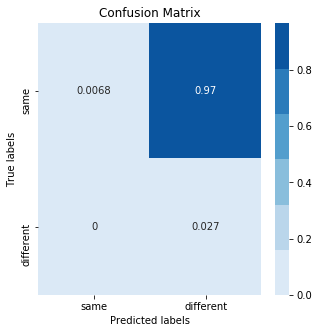

0.93


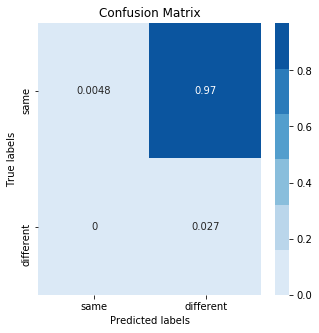

0.94


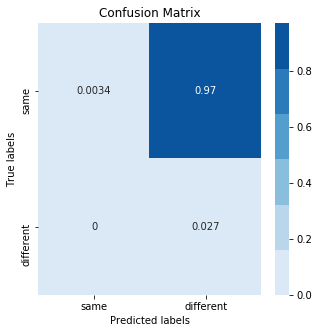

0.95


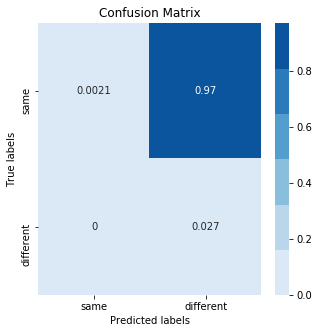

0.96


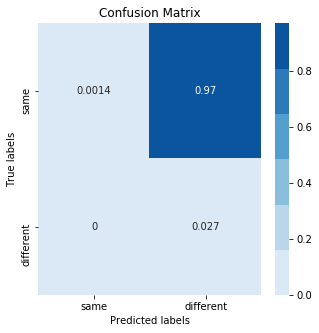

0.97


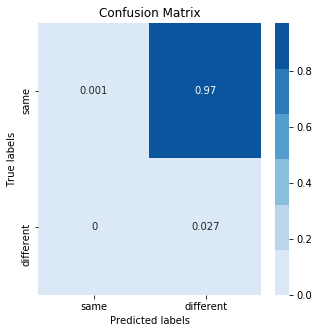

0.98


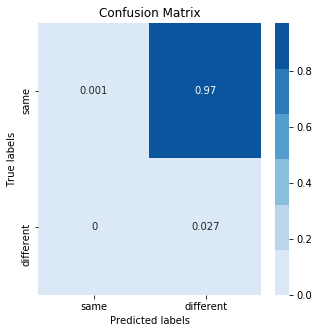

0.99


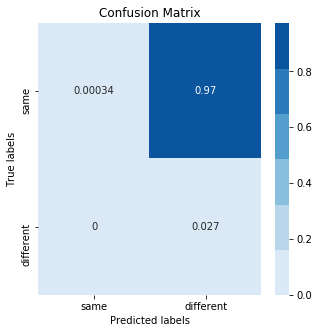

1.0


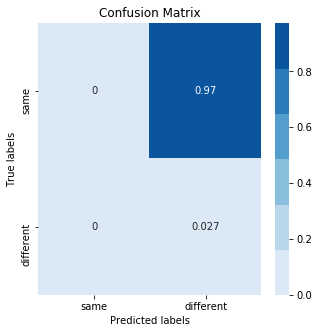

In [15]:
cls = ['same', 'different']
error_list=[]
error_dic={}
for i, column in enumerate(d):
    print(column)
    cols = np.array(d[column])
    error_dic = normalized_cnf_matrix(cls, column, 2000) #ACHTUNG!alles irgendwie schöner machen, in eine Schleife
    error_dic['percentage'] = column
    error_list.append(error_dic)

In [16]:
errors = pd.DataFrame(error_list)
errors

,tn,fp,fn,tp,percentage
0,0.973342,0.000000,0.026316,0.000342,0.01
1,0.973342,0.000000,0.025290,0.001367,0.02
2,0.973342,0.000000,0.024949,0.001709,0.03
3,0.973001,0.000342,0.023923,0.002734,0.04
4,0.972659,0.000684,0.021873,0.004785,0.05
...,...,...,...,...,...
95,0.001367,0.971975,0.000000,0.026658,0.96
96,0.001025,0.972317,0.000000,0.026658,0.97
97,0.001025,0.972317,0.000000,0.026658,0.98
98,0.000342,0.973001,0.000000,0.026658,0.99


In [17]:
minc = min(cos)
maxc = max(cos)
errors.name = ('min: {}, max: {}'.format(minc, maxc))

In [18]:
errors.name

'min: 0.02, max: 1.94'

In [19]:
errors.to_csv('errors_corpusDE')

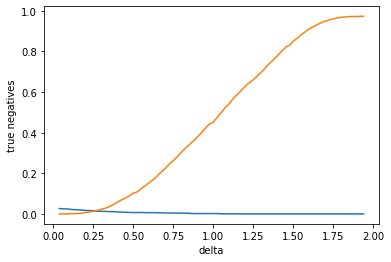

In [20]:
n = np.arange(0.01, 1.01, 0.01)
x = []
for perc in n:
    x.append(minc + cos_range*perc)
z = errors['fn']
y = errors['fp']
ax = plt.plot(x, z)
ax = plt.plot(x, y)
plt.xlabel("delta") 
plt.ylabel("true negatives") 

plt.show() 

In [56]:
errors2 = errors.copy()
errors2.drop('tn', inplace=True, axis=1)
errors2.drop('tp', inplace=True, axis=1)
#errors2.drop('percentage', inplace=True, axis=1)

df = errors2.melt('percentage', var_name='errors',  value_name='vals')
df

,percentage,errors,vals
0,0.01,fp,0.000000
1,0.02,fp,0.000000
2,0.03,fp,0.000000
3,0.04,fp,0.000342
4,0.05,fp,0.000684
...,...,...,...
195,0.96,fn,0.000000
196,0.97,fn,0.000000
197,0.98,fn,0.000000
198,0.99,fn,0.000000


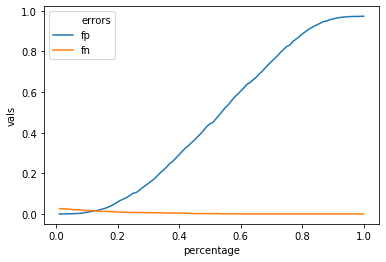

In [57]:
#sns.lineplot(data=errors2)
g = sns.lineplot(x="percentage", y="vals", hue='errors', data=df)

In [121]:
#berechne Schnittpunkt zwischen alpha und beta fehler
print((errors2.query('fn <= fp')).iloc[0].name)
(errors2.query('fp <= fn')).iloc[-1].name

46


45

In [81]:
df2=errors2.stack().reset_index()
df2.columns = ['Series','Event','Values']
print(df2)

     Series Event    Values
0         0    fp  0.000000
1         0    fn  0.026316
2         1    fp  0.000000
3         1    fn  0.026316
4         2    fp  0.000000
..      ...   ...       ...
195      97    fn  0.000000
196      98    fp  0.972317
197      98    fn  0.000000
198      99    fp  0.973342
199      99    fn  0.000000

[200 rows x 3 columns]


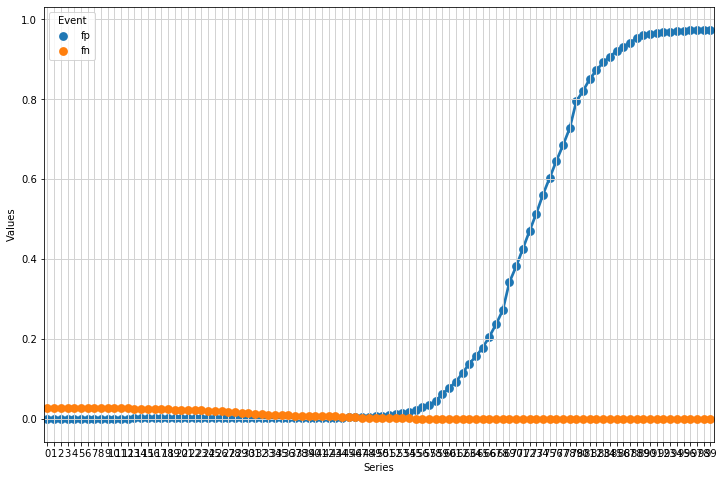

In [82]:
plt.figure(figsize=(12,8))
ax = sns.pointplot(x='Series', y='Values', hue='Event',data=df2)
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

In [42]:
# visulisiere alpha und beta Fehler
# lege Delta-Kurven der verschiedenen Korpora übereinander, auch der Fehler evtl?
# verschiedene MFW-Werte austesten
# Streuung der Korpora

#### calculate mean length of chinese corpus

In [8]:
import pandas as pd
import regex as re

def wordcounts_in_file(f_name):
    """

    :param f_name: filename of file to be analyzed
    :return: Counter of tokenized file
    """
    with open(f_name, encoding='utf-8') as f:
        # return Counter(remove_stopwords(f))
        return Counter(tokenize(f))

def tokenize(lines, token=re.compile(r'\p{L}+')):
    """

    :param lines (str): object to be tokenized, e.g. file
    :param token: pattern to tokenize lines
    :return: lowered and tokenized string
    """
    for line in lines:
        yield from map(str.lower, token.findall(line))

In [115]:
import glob
from collections import Counter

path = 'dataset_fuer_mich/refcor-master/Chinese/*.txt'
length = []

for file in glob.glob(path):
    i=0
    count = wordcounts_in_file(file)
    for c in count:
        i = i + count[c]
    length.append(i)

In [116]:
i / 150
print(max(length), min(length))
sum(length)/75

466305 14381


96452.44

In [159]:
explor = pd.read_csv('dataexploration_corpora.csv', encoding='utf-8')
explor.drop('max_min', axis=1, inplace=True)
explor.drop_duplicates(inplace=True)
explor

,Korpus,Mittlere Textlänge,Textarten,Anzahl Autoren,Anzahl Texte,Zeitraum,balanciert
0,refcor_DE,137980,novels,25,75,1774-1926,ja
1,refcor_FR,98607,novels,25,75,1827-1934,ja
2,refcor_EN,156933,novels,25,75,1838-1921,ja
6,refcor_C,96452,novels,25,75,1904-2012 (???),ja
8,piper_DE,96693,novels,86,150,1771-1932,nein
9,piper_FR,94446,novels,95,150,1771-1929,nein
10,piper_EN,126132,novels,97,150,1771-1930,nein


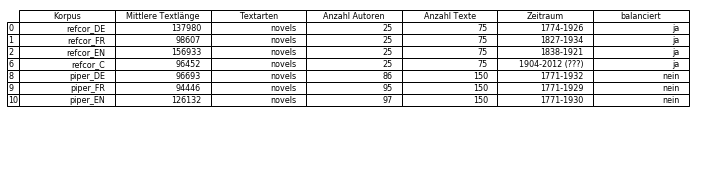

In [199]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table 
fig, ax = plt.subplots(figsize=(12, 3)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, explor, loc='upper right')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(8) 
# save the result
plt.savefig('dataexploration_corpora.png')

In [129]:
box = explor.copy()
box.drop('Mittlere Textlänge', axis=1, inplace=True)
box.drop('Textarten', axis=1, inplace=True)
box.drop('Anzahl Autoren', axis=1, inplace=True)
box.drop('Anzahl Texte', axis=1, inplace=True)
box.drop('Zeitraum', axis=1, inplace=True)
box.drop('balanciert', axis=1, inplace=True)
box

,Korpus,max_min
0,refcor_DE,19818
1,refcor_FR,33501
2,refcor_EN,40706
3,refcor_DE,761380
4,refcor_FR,209664
5,refcor_EN,456581
6,refcor_C,14381
7,refcor_C,466305
8,piper_DE,13541
9,piper_FR,26071


In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

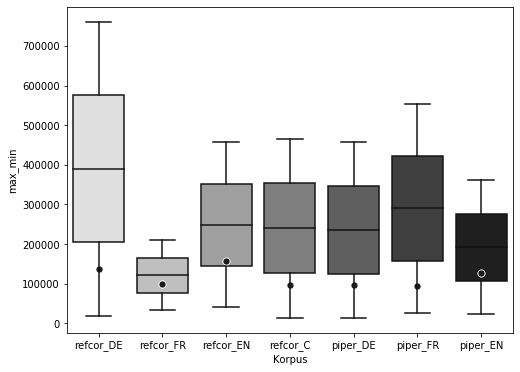

In [152]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Korpus', y='Mittlere Textlänge', data=explor, color='.1', s=50)
sns.boxplot(x='Korpus', y='max_min', data=box, palette='binary')
plt.savefig("textlaenge_alle_korpora.png")